# 첫 번째 합성곱 신경망

## 라이브러리 임포트

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


## 데이터 적재

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

## 모델 만들기

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

## 모델 훈련

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 168s 3ms/step - loss: 1.5358 - acc: 0.4646 - val_loss: 1.5630 - val_acc: 0.4706
Epoch 2/10
50000/50000 [==============================] - 171s 3ms/step - loss: 1.1484 - acc: 0.5968 - val_loss: 1.1830 - val_acc: 0.5760
Epoch 3/10
50000/50000 [==============================] - 171s 3ms/step - loss: 0.9951 - acc: 0.6541 - val_loss: 1.0003 - val_acc: 0.6505
Epoch 4/10
50000/50000 [==============================] - 172s 3ms/step - loss: 0.9071 - acc: 0.6829 - val_loss: 0.8837 - val_acc: 0.6882
Epoch 5/10
50000/50000 [==============================] - 170s 3ms/step - loss: 0.8479 - acc: 0.7052 - val_loss: 0.9754 - val_acc: 0.6647
Epoch 6/10
50000/50000 [==============================] - 172s 3ms/step - loss: 0.7916 - acc: 0.7238 - val_loss: 0.8481 - val_acc: 0.7045
Epoch 7/10
50000/50000 [==============================] - 170s 3ms/step - 

In [12]:
model.layers[6].get_weights()

[]

In [14]:
model.layers[5].get_weights()

[array([1.1145343 , 0.934687  , 0.82203877, 1.0012658 , 1.0715009 ,
        0.89653593, 1.2039982 , 1.2648573 , 1.0569712 , 1.0028843 ,
        0.9076695 , 0.92848724, 1.0856112 , 0.8417619 , 1.0650092 ,
        0.88482535, 0.9192618 , 0.9636338 , 1.1201807 , 0.95622766,
        0.9378168 , 0.9713128 , 1.0766419 , 0.9297941 , 0.85860854,
        0.9325736 , 1.005958  , 0.9570102 , 0.9861854 , 0.8652354 ,
        0.9816114 , 1.0504072 ], dtype=float32),
 array([-0.14812972, -0.19665459, -0.17662142,  0.20942785, -0.00328338,
        -0.09368465, -0.19891757, -0.13836074, -0.2106934 , -0.10528033,
        -0.01378559,  0.03417759, -0.15139242, -0.15342237, -0.11015633,
        -0.08703941, -0.1844945 ,  0.00159069, -0.07752977, -0.22143698,
        -0.21848404, -0.21624352, -0.13508524, -0.15547706, -0.12460955,
        -0.13104188, -0.08297437, -0.21147187, -0.07284993, -0.11330432,
        -0.06217159, -0.14093097], dtype=float32),
 array([-0.1903704 , -0.76536256, -1.0727973 , -1.1992

## 모델 평가

In [15]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 8s 759us/step


[0.7876150846481323, 0.7335999965667724]

In [16]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

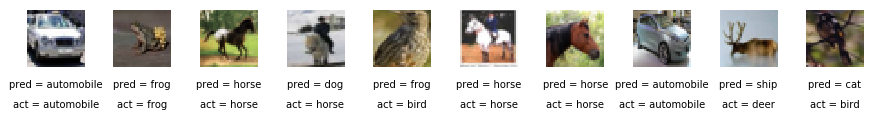

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)